In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import plotly.graph_objects as go
%matplotlib inline

In [14]:
df = pd.read_pickle("../data/output/summary.pkl")
df

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing,total_ds,total_sdg,total_ds/sdg
SDG1,145,64,29,13,17,28,11,307,29894,1.026962
SDG2,233,41,91,50,21,71,8,515,18104,2.844675
SDG3,2997,472,574,260,224,530,215,5272,119269,4.42026
SDG4,1004,183,169,77,19,217,70,1739,57351,3.032205
SDG5,662,128,98,73,10,218,50,1239,63331,1.956388
SDG6,1989,214,434,247,39,199,227,3349,131579,2.545239
SDG7,3005,1484,5381,2383,100,799,146,13298,70331,18.907736
SDG8,440,167,228,250,48,117,138,1388,28674,4.840622
SDG9,565,323,483,420,59,190,357,2397,28758,8.335072
SDG10,423,147,118,99,23,91,61,962,27318,3.521488


## Plotly bubble graph function

In [15]:
def plot_bubble_graph(df, size_circle=75, title = "heatmap", save=False, saveloc=None, resolution=(1920,1080)):
    maxi = df.to_numpy().max()
    size_circle = float(size_circle)
    lst =[]
    for i in range(len(df.index)):
           for j in range(len(df.columns)):
                  lst.append((i,j))


    fig = go.Figure(data=[go.Scatter(
           x = [elem[0] for elem in lst],
           y = [elem[1] for elem in lst],
           mode='markers',
           marker=dict(
                  color = [float(df.iloc[[elem[0]], elem[1]]) for elem in lst],
                  size =  [float(df.iloc[[elem[0]], elem[1]])*size_circle/maxi for elem in lst],
                  showscale=True
           ),
    )])

    fig.update_layout(
        template="plotly",
        xaxis = dict(
            tickmode = 'array',
            tickvals = list(range(len(df.index))),
            ticktext = list(df.index)
        ),
        yaxis = dict(
            tickmode = 'array',
            tickvals = list(range(len(df.columns))),
            ticktext = list(df.columns)
        ),
        title=title
    )
    if save:
        if saveloc is None:
            fig.write_image('../img/' + title + '.jpeg', width=resolution[0], height=resolution[1], scale=1)
        else:
            fig.write_image(saveloc + title + '.jpeg', width=resolution[0], height=resolution[1], scale=1)

    return fig

In [16]:
df_summary_notot = df.drop(['total_ds', 'total_sdg', 'total_ds/sdg'], axis=1)

df_summary_notot = df_summary_notot.drop(['total', 'percentage_ds'])
# df_summary_notot = df_heat.astype(float)
df_summary_notot.to_pickle("../data/output/summary_notot.pkl")
df_summary_notot

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
SDG1,145,64,29,13,17,28,11
SDG2,233,41,91,50,21,71,8
SDG3,2997,472,574,260,224,530,215
SDG4,1004,183,169,77,19,217,70
SDG5,662,128,98,73,10,218,50
SDG6,1989,214,434,247,39,199,227
SDG7,3005,1484,5381,2383,100,799,146
SDG8,440,167,228,250,48,117,138
SDG9,565,323,483,420,59,190,357
SDG10,423,147,118,99,23,91,61


In [17]:
fig = plot_bubble_graph(df_summary_notot, size_circle=75,  title='Repartition of publications between SDGs and Digital Technologies, emphasis on raw values',save=True, resolution=(1280,720))
fig.show()

## Percentage of SDGs
Instead of raw values, we compute the percentage for each cell as the value divided by the total of that digital science technology on all SDG.


In [18]:
df_summary_sdg = df_summary_notot.copy()
for col in df_summary_sdg.columns:
       df_summary_sdg[col] = df_summary_sdg[col].apply(lambda x:100*x/df_summary_sdg[col].sum())
df_summary_sdg

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
SDG1,0.537694,0.901917,0.240464,0.199631,1.367659,0.433571,0.435127
SDG2,0.864019,0.577790,0.754561,0.767813,1.689461,1.099412,0.316456
SDG3,11.113583,6.651635,4.759536,3.992629,18.020917,8.206875,8.504747
SDG4,3.723069,2.578918,1.401327,1.182432,1.528560,3.360173,2.768987
SDG5,2.454852,1.803833,0.812604,1.121007,0.804505,3.375658,1.977848
SDG6,7.375681,3.015784,3.598673,3.792998,3.137570,3.081449,8.979430
SDG7,11.143249,20.913191,44.618574,36.593980,8.045052,12.372251,5.775316
SDG8,1.631624,2.353439,1.890547,3.839066,3.861625,1.811706,5.458861
SDG9,2.095153,4.551860,4.004975,6.449631,4.746581,2.942087,14.121835
SDG10,1.568584,2.071590,0.978441,1.520270,1.850362,1.409105,2.412975


In [19]:
fig = plot_bubble_graph(df_summary_sdg, size_circle=75,  title='Repartition of publications between SDGs and Digital Science Technologies, percentage of SDGs',save=True, resolution=(1280,720))
fig.show()

## Percentage of DSTs
Instead of raw values, we compute the percentage for each cell as the value divided by the total of that SDG on all digital science techonlogies.

In [20]:
df_summary_dst = df_summary_notot.copy()
df_summary_dst = df_summary_dst.transpose()
for col in df_summary_dst.columns:
       df_summary_dst[col] = df_summary_dst[col].apply(lambda x:x/df_summary_dst[col].sum())
df_summary_dst = df_summary_dst.transpose()
df_summary_dst

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
SDG1,0.472313,0.208469,0.094463,0.042345,0.055375,0.091205,0.035831
SDG2,0.452427,0.079612,0.176699,0.097087,0.040777,0.137864,0.015534
SDG3,0.568475,0.089530,0.108877,0.049317,0.042489,0.100531,0.040781
SDG4,0.577343,0.105233,0.097182,0.044278,0.010926,0.124784,0.040253
SDG5,0.534302,0.103309,0.079096,0.058918,0.008071,0.175948,0.040355
SDG6,0.593909,0.063900,0.129591,0.073753,0.011645,0.059421,0.067781
SDG7,0.225974,0.111596,0.404647,0.179200,0.007520,0.060084,0.010979
SDG8,0.317003,0.120317,0.164265,0.180115,0.034582,0.084294,0.099424
SDG9,0.235711,0.134752,0.201502,0.175219,0.024614,0.079266,0.148936
SDG10,0.439709,0.152807,0.122661,0.102911,0.023909,0.094595,0.063410


In [21]:
fig = plot_bubble_graph(df_summary_dst, size_circle=75,  title='Repartition of publications between SDGs and Digital Science Technologies, percentage of DSTs',save=True, resolution=(1280,720))
fig.show()

## SDGs are part of 3 categories : Environmental, Societal and Economical
!['SDGs Vinesa 2020](../img/3categories_vinuesa.png)


In [22]:
df1 = df_summary_notot.copy()
df1 = df1.transpose()
df1['Society'] = df1.apply(lambda x:x['SDG1']+x['SDG2']+x['SDG3']+x['SDG4']+x['SDG5']+x['SDG6']+x['SDG7']+x['SDG11']+x['SDG16'], axis=1)
df1['Economy'] = df1.apply(lambda x:x['SDG8']+x['SDG9']+x['SDG10']+x['SDG12']+x['SDG17'], axis=1)
df1['Environment'] =  df1.apply(lambda x:x['SDG13']+x['SDG14']+x['SDG15'], axis=1)
df1 = df1[['Society', 'Economy', 'Environment']].transpose()
df1

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
Society,14585,3896,8208,3877,742,2852,893
Economy,3314,1366,1741,1343,305,782,990
Environment,9068,1834,2111,1292,196,2824,645


In [23]:
fig = plot_bubble_graph(df1, size_circle=70,  title='Repartition of publications between SDGs and Digital Science Technologies, by categories',save=True, resolution=(900,700))
fig.show()

In [24]:
df1_tot = df1.copy().astype(int)
df1_tot['tot_dst'] = df1_tot.sum(axis=1)
df1_tot = df1_tot.transpose()
df1_tot['tot_sdg'] = df1_tot.sum(axis=1)
df1_tot = df1_tot.transpose()
df1_tot

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing,tot_dst
Society,14585,3896,8208,3877,742,2852,893,35053
Economy,3314,1366,1741,1343,305,782,990,9841
Environment,9068,1834,2111,1292,196,2824,645,17970
tot_sdg,26967,7096,12060,6512,1243,6458,2528,62864


In [25]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
col = [df1_tot.columns.tolist()]
col[0].insert(0, "")
body = df1_tot.astype(int).reset_index().values.tolist()
fig = ff.create_table(col + body)

fig.update_layout(title="SDGs by category", showlegend=True, font={'size':5})
fig.write_image('../img/table_categories.jpeg', width=800, height=200, scale=2)
fig.show()


In [26]:
df_heat = df.drop(['total_ds', 'total_sdg', 'total_ds/sdg'], axis=1)
tot = df_heat.loc[['total']]
df_heat = df_heat.drop(['total', 'percentage_ds'])
df_heat = df_heat.astype(float).transpose()
for col in df_heat.columns:
       df_heat[col] = df_heat[col].apply(lambda x:100*x/df_heat[col].sum())
df_heat = df_heat.transpose()
df_heat

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
SDG1,47.231270,20.846906,9.446254,4.234528,5.537459,9.120521,3.583062
SDG2,45.242718,7.961165,17.669903,9.708738,4.077670,13.786408,1.553398
SDG3,56.847496,8.952959,10.887709,4.931715,4.248862,10.053111,4.078149
SDG4,57.734330,10.523289,9.718229,4.427832,1.092582,12.478436,4.025302
SDG5,53.430186,10.330912,7.909605,5.891848,0.807103,17.594835,4.035513
SDG6,59.390863,6.389967,12.959092,7.375336,1.164527,5.942072,6.778143
SDG7,22.597383,11.159573,40.464732,17.919988,0.751993,6.008422,1.097909
SDG8,31.700288,12.031700,16.426513,18.011527,3.458213,8.429395,9.942363
SDG9,23.571131,13.475177,20.150188,17.521902,2.461410,7.926575,14.893617
SDG10,43.970894,15.280665,12.266112,10.291060,2.390852,9.459459,6.340956


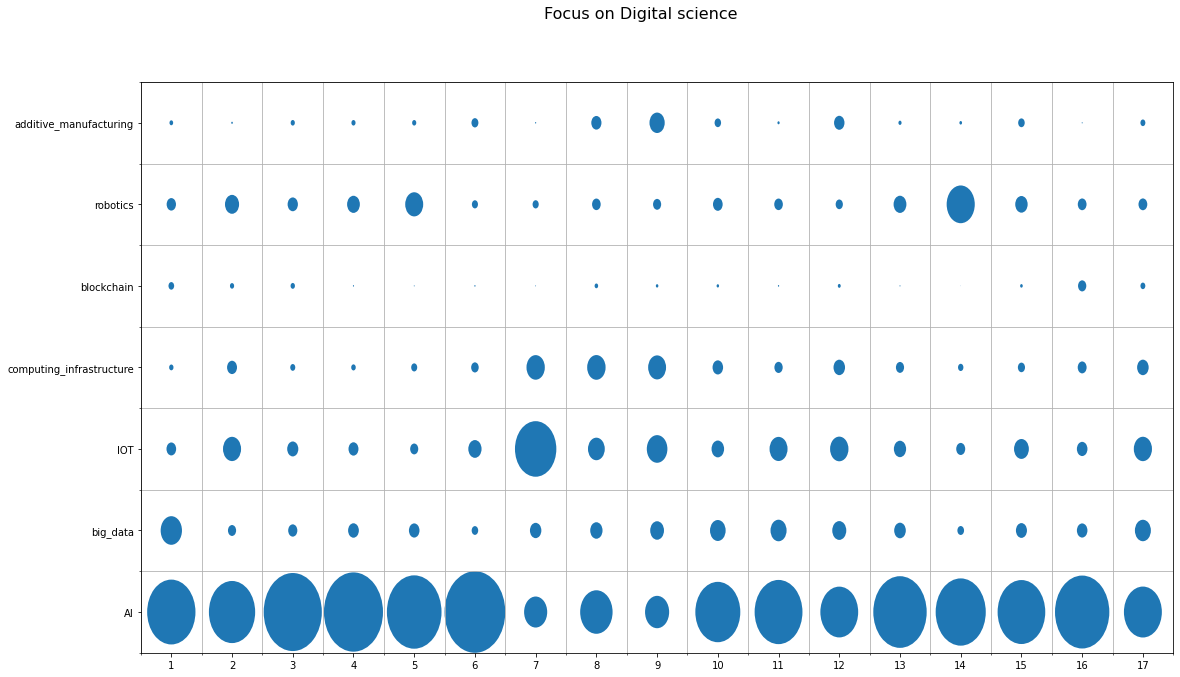

In [27]:


ylabels = list(df_heat.columns)
xlabels = [inde[3:] for inde in list(df_heat.index) if 'SDG' in inde]
M,N = len(xlabels), len(ylabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))

s = df_heat.to_numpy()


fig, ax = plt.subplots(facecolor='w')
fig.set_size_inches(18.5, 10.5)
R = s/s.max()/2
circles = [plt.Circle((j,i), radius=R[j][i]) for j, i in zip(x.flat, y.flat)]
# col = PatchCollection(circles, array=s.flatten(), cmap="RdYlGn")
col = PatchCollection(circles)
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

# fig.colorbar(col)
fig.suptitle('Focus on Digital science', fontsize=16)
fig.savefig('../img/heatmap_focus_on_digital_science.png', dpi=fig.dpi)
plt.show()


Focus on SDG

In [28]:
df_heat = df.drop(['total_ds', 'total_sdg', 'total_ds/sdg'], axis=1)
tot = df_heat.loc[['total']]
df_heat = df_heat.drop(['total', 'percentage_ds'])
df_heat = df_heat.astype(float)
for col in df_heat.columns:
       df_heat[col] = df_heat[col].apply(lambda x:100*x/df_heat[col].sum())
df_heat

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
SDG1,0.537694,0.901917,0.240464,0.199631,1.367659,0.433571,0.435127
SDG2,0.864019,0.577790,0.754561,0.767813,1.689461,1.099412,0.316456
SDG3,11.113583,6.651635,4.759536,3.992629,18.020917,8.206875,8.504747
SDG4,3.723069,2.578918,1.401327,1.182432,1.528560,3.360173,2.768987
SDG5,2.454852,1.803833,0.812604,1.121007,0.804505,3.375658,1.977848
SDG6,7.375681,3.015784,3.598673,3.792998,3.137570,3.081449,8.979430
SDG7,11.143249,20.913191,44.618574,36.593980,8.045052,12.372251,5.775316
SDG8,1.631624,2.353439,1.890547,3.839066,3.861625,1.811706,5.458861
SDG9,2.095153,4.551860,4.004975,6.449631,4.746581,2.942087,14.121835
SDG10,1.568584,2.071590,0.978441,1.520270,1.850362,1.409105,2.412975


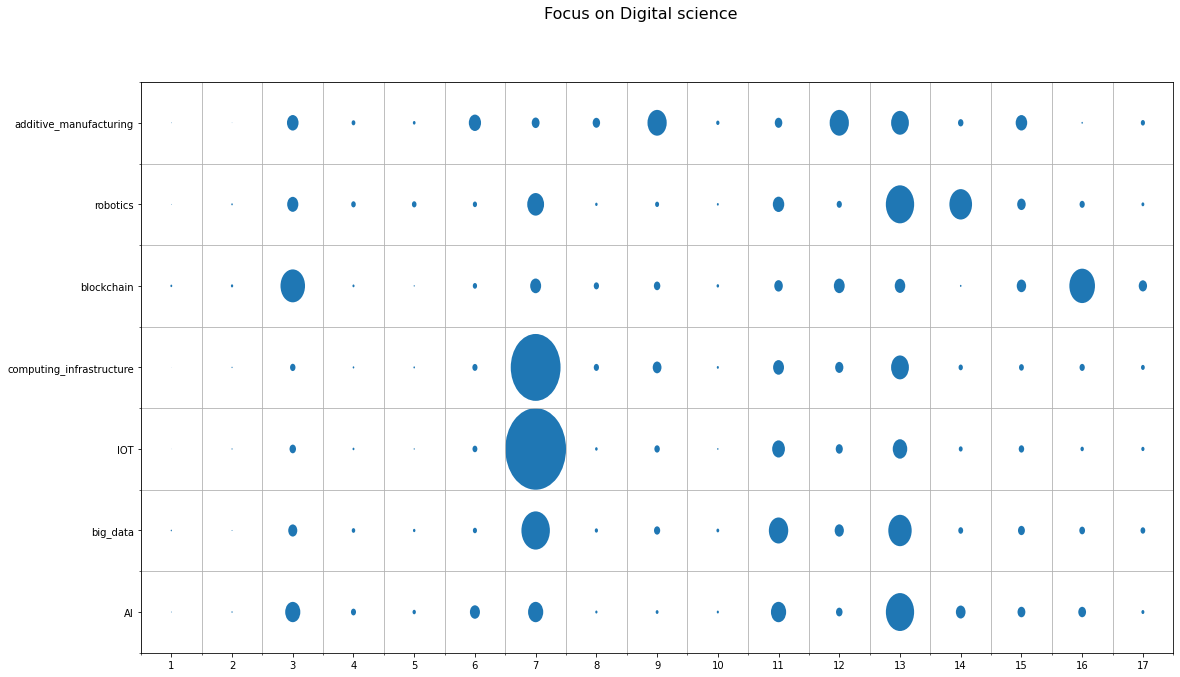

In [29]:


ylabels = list(df_heat.columns)
xlabels = [inde[3:] for inde in list(df_heat.index) if 'SDG' in inde]
M,N = len(xlabels), len(ylabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))

s = df_heat.to_numpy()


fig, ax = plt.subplots(facecolor='w')
fig.set_size_inches(18.5, 10.5)
R = s/s.max()/2
circles = [plt.Circle((j,i), radius=R[j][i]) for j, i in zip(x.flat, y.flat)]
# col = PatchCollection(circles, array=s.flatten(), cmap="RdYlGn")
col = PatchCollection(circles)
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

# fig.colorbar(col)
fig.suptitle('Focus on Digital science', fontsize=16)
fig.savefig('../img/heatmap_focus_on_goals.png', dpi=fig.dpi)
plt.show()


In [30]:
lst =[]
for i in range(len(df_heat.index)):
       for j in range(len(df_heat.columns)):
              lst.append((i,j))
lst

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (11, 0),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (12, 0),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (12, 5),
 (12, 6),
 (13, 0),
 (13, 1),
 (13, 2),
 (13, 3),
 (13, 4),
 (13, 5),
 (13, 6),
 (14, 0),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4),
 (14, 5),
 (14, 6),
 (15, 0),
 (15, 1),


In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
       x = [elem[0] for elem in lst],
       y = [elem[1] for elem in lst],
       mode='markers',
       marker=dict(
              color = [float(df_heat.iloc[[elem[0]], elem[1]]) for elem in lst],
              size =  [float(df_heat.iloc[[elem[0]], elem[1]]) for elem in lst],
              showscale=True
       )
)])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(df_heat.index))),
        ticktext = list(df_heat.index)
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(df_heat.columns))),
        ticktext = list(df_heat.columns)
    )
)

fig.show()

In [32]:
fig = go.Figure(data=go.Heatmap(
                   z=df_heat.to_numpy(),
                   x=list(df_heat.columns),
                   y=list(df_heat.index),
                   hoverongaps = False))
fig.show()

In [33]:
df

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing,total_ds,total_sdg,total_ds/sdg
SDG1,145,64,29,13,17,28,11,307,29894,1.026962
SDG2,233,41,91,50,21,71,8,515,18104,2.844675
SDG3,2997,472,574,260,224,530,215,5272,119269,4.42026
SDG4,1004,183,169,77,19,217,70,1739,57351,3.032205
SDG5,662,128,98,73,10,218,50,1239,63331,1.956388
SDG6,1989,214,434,247,39,199,227,3349,131579,2.545239
SDG7,3005,1484,5381,2383,100,799,146,13298,70331,18.907736
SDG8,440,167,228,250,48,117,138,1388,28674,4.840622
SDG9,565,323,483,420,59,190,357,2397,28758,8.335072
SDG10,423,147,118,99,23,91,61,962,27318,3.521488


Societial SDGs = 1,2,3,4,5,6,7,11,16
Econimical SDGs = 8+9+10+12+17
Environmental SDGs = 13+14+15

In [34]:
df1 = df.drop(['total_ds', 'total_sdg', 'total_ds/sdg'], axis=1)
df1 = df1.drop(['total', 'percentage_ds']).transpose()
df1

,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
AI,145,233,2997,1004,662,1989,3005,440,565,423,3010,1295,5597,1916,1555,1540,591
big_data,64,41,472,183,128,214,1484,167,323,147,1011,480,1219,255,360,299,249
IOT,29,91,574,169,98,434,5381,228,483,118,1132,629,1283,344,484,300,283
computing_infrastructure,13,50,260,77,73,247,2383,250,420,99,522,394,853,206,233,252,180
blockchain,17,21,224,19,10,39,100,48,59,23,78,99,96,14,86,234,76
robotics,28,71,530,217,218,199,799,117,190,91,542,247,1344,1075,405,248,137
additive_manufacturing,11,8,215,70,50,227,146,138,357,61,140,357,330,101,214,26,77


In [35]:
df1['Society'] = df1.apply(lambda x:x['SDG1']+x['SDG2']+x['SDG3']+x['SDG4']+x['SDG5']+x['SDG6']+x['SDG7']+x['SDG11']+x['SDG16'], axis=1)
df1['Economy'] = df1.apply(lambda x:x['SDG8']+x['SDG9']+x['SDG10']+x['SDG12']+x['SDG17'], axis=1)
df1['Environment'] =  df1.apply(lambda x:x['SDG13']+x['SDG14']+x['SDG15'], axis=1)
df1 = df1[['Society', 'Economy', 'Environment']].transpose()
df1

,AI,big_data,IOT,computing_infrastructure,blockchain,robotics,additive_manufacturing
Society,14585,3896,8208,3877,742,2852,893
Economy,3314,1366,1741,1343,305,782,990
Environment,9068,1834,2111,1292,196,2824,645


In [36]:
maxi = df1.to_numpy().max()

In [37]:
float(df1.iloc[0, 1])

3896.0

In [38]:
lst =[]
for i in range(len(df1.index)):
       for j in range(len(df1.columns)):
              lst.append((i,j))

fig = go.Figure(data=[go.Scatter(
       x = [elem[0] for elem in lst],
       y = [elem[1] for elem in lst],
       mode='markers',
       marker=dict(
              color = [float(df1.iloc[[elem[0]], elem[1]])/maxi for elem in lst],
              size =  [50*float(df1.iloc[[elem[0]], elem[1]])/maxi for elem in lst],
              showscale=True
       )

)])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2],
        ticktext = list(df1.index)
    ),
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(df1.columns))),
        ticktext = list(df1.columns)
    )
)

fig.show()

In [39]:
fig = go.Figure(data=go.Heatmap(
                   z=df1.to_numpy(),
                   x=list(df1.columns),
                   y=list(df1.index),
                text=[str(x) for lst in df1.values.tolist() for x in lst],
                   hoverongaps = False),

)
fig.show()

In [40]:
import plotly.express as px
data=df1.to_numpy()
fig = px.imshow(data,
                x=list(df1.columns),
                y=list(df1.index),

               )
fig.update_xaxes(side="top")
fig.show()